<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/Battery-Project/data-preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
bat_process = pd.read_csv('/content/mydrive/MyDrive/posco-big-data/bat_process.csv', encoding = 'euc-kr')

print(bat_process.shape)
bat_process.head()

(43754, 109)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (97,101,102,103) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품,10,08열,33연,08단,03열,...,37연,04단,3759.3,5,6.8,4718,37583,94,565,164
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품,7,08열,33연,08단,03열,...,37연,04단,3758.4,5,6.8,4718,37574,94,565,73
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품,19,08열,33연,08단,03열,...,37연,04단,3759,5.1,6.9,4700,37579,91,585,-57
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품,24,08열,33연,08단,03열,...,37연,04단,3759.5,5.1,6.9,4688,37583,93,606,99
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품,17,08열,33연,08단,03열,...,37연,04단,3758.2,5,6.8,4696,37570,91,605,36


In [11]:
bat_tat = pd.read_csv('/content/mydrive/MyDrive/posco-big-data/bat_tat.csv', encoding = 'euc-kr')

print(bat_tat.shape)
bat_tat.head()

(43754, 25)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,lot_id,tray_id,dt_start,cell_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,...,ocv2_tat,pg1_tat,pc1_tat,sa1_tat,socv1_tat,sa2_tat,socv2_tat,sa3_tat,socv3_tat,sa4_tat
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,217066,86461,5732,119,3556,404,...,118,290,290,53500,5,355357,5,215150,5,207532
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,217066,86461,5732,119,3556,404,...,118,290,290,53500,5,355357,5,215150,5,207532
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,217066,86461,5732,118,3556,405,...,118,290,290,53500,5,355357,5,215150,5,207532
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,217066,86461,5732,118,3556,405,...,118,290,290,53501,5,355357,5,215150,5,207532
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,217066,86461,5732,119,3556,404,...,118,290,290,53500,5,355357,5,215150,5,207532


In [9]:
bat_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43754 entries, 0 to 43753
Columns: 109 entries, lot_id to m1_voltage_an
dtypes: float64(1), int64(54), object(54)
memory usage: 36.4+ MB


In [8]:
bat_tat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43754 entries, 0 to 43753
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lot_id     43754 non-null  object
 1   tray_id    43754 non-null  object
 2   dt_start   43754 non-null  object
 3   cell_id    43754 non-null  object
 4   rta1_tat   43754 non-null  int64 
 5   hta1_tat   43754 non-null  int64 
 6   rta2_tat   43754 non-null  int64 
 7   ocv1_tat   43754 non-null  int64 
 8   c1_tat     43754 non-null  int64 
 9   dc1_tat    43754 non-null  int64 
 10  c2_tat     43754 non-null  int64 
 11  dc2_tat    43754 non-null  int64 
 12  c3_tat     43754 non-null  int64 
 13  dc3_tat    43754 non-null  int64 
 14  c4_tat     43754 non-null  int64 
 15  ocv2_tat   43754 non-null  int64 
 16  pg1_tat    43754 non-null  int64 
 17  pc1_tat    43754 non-null  int64 
 18  sa1_tat    43754 non-null  int64 
 19  socv1_tat  43754 non-null  int64 
 20  sa2_tat    43754 non-null  o

In [82]:
df_raw = pd.merge(bat_tat, bat_process)

print(df_raw.shape)
df_raw.head()

(43754, 130)


,lot_id,tray_id,dt_start,cell_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,217066,86461,5732,119,3556,404,...,37연,04단,3759.3,5,6.8,4718,37583,94,565,164
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,217066,86461,5732,119,3556,404,...,37연,04단,3758.4,5,6.8,4718,37574,94,565,73
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,217066,86461,5732,118,3556,405,...,37연,04단,3759,5.1,6.9,4700,37579,91,585,-57
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,217066,86461,5732,118,3556,405,...,37연,04단,3759.5,5.1,6.9,4688,37583,93,606,99
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,217066,86461,5732,119,3556,404,...,37연,04단,3758.2,5,6.8,4696,37570,91,605,36


**결측치 확인하기**

In [83]:
df_raw.isnull().sum()

lot_id           0
tray_id          0
dt_start         0
cell_id          0
rta1_tat         0
                ..
m1_thick         0
m1_voltage       0
m1_res_ac        0
m1_mv            0
m1_voltage_an    0
Length: 130, dtype: int64

### **12-14번 공정 확인하기**

In [84]:
df_raw.columns

Index(['lot_id', 'tray_id', 'dt_start', 'cell_id', 'rta1_tat', 'hta1_tat',
       'rta2_tat', 'ocv1_tat', 'c1_tat', 'dc1_tat',
       ...
       'sa3_box_row', 'sa3_box_dan', 'socv3_ocv', 'ocv2_deltaocv',
       'ocv1_deltaocv', 'm1_thick', 'm1_voltage', 'm1_res_ac', 'm1_mv',
       'm1_voltage_an'],
      dtype='object', length=130)

In [85]:
a = df_raw.loc[:, 'lot_id' : 'sa4_tat']
b = df_raw['judge']
c = df_raw.loc[:, 'ocv2_ocv' : 'pc1_box_dan']

In [86]:
df_raw_minji = pd.concat([a,b,c], axis = 1)

print(df_raw_minji.shape)
df_raw_minji.head()

(43754, 41)


,lot_id,tray_id,dt_start,cell_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,...,pg1_voltage_start,pg1_curr_end,pg1_box_col,pg1_box_dan,pg1_temp_avg,pc1_imp,pc1_voltage_start,pc1_curr_end,pc1_box_col,pc1_box_dan
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,217066,86461,5732,119,3556,404,...,3759,120,12열,01단,288,2086,3714,150,12열,01단
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,217066,86461,5732,119,3556,404,...,3758,120,12열,01단,288,2093,3714,150,12열,01단
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,217066,86461,5732,118,3556,405,...,3759,120,12열,01단,288,2081,3715,150,12열,01단
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,217066,86461,5732,118,3556,405,...,3759,119,12열,01단,288,2083,3714,150,12열,01단
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,217066,86461,5732,119,3556,404,...,3758,120,12열,01단,288,2083,3714,150,12열,01단


In [87]:
df_raw_minji.columns

Index(['lot_id', 'tray_id', 'dt_start', 'cell_id', 'rta1_tat', 'hta1_tat',
       'rta2_tat', 'ocv1_tat', 'c1_tat', 'dc1_tat', 'c2_tat', 'dc2_tat',
       'c3_tat', 'dc3_tat', 'c4_tat', 'ocv2_tat', 'pg1_tat', 'pc1_tat',
       'sa1_tat', 'socv1_tat', 'sa2_tat', 'socv2_tat', 'sa3_tat', 'socv3_tat',
       'sa4_tat', 'judge', 'ocv2_ocv', 'ocv2_box_col', 'ocv2_box_dan',
       'pg1_impfit', 'pg1_imp', 'pg1_voltage_start', 'pg1_curr_end',
       'pg1_box_col', 'pg1_box_dan', 'pg1_temp_avg', 'pc1_imp',
       'pc1_voltage_start', 'pc1_curr_end', 'pc1_box_col', 'pc1_box_dan'],
      dtype='object')

In [88]:
df_raw_minji.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43754 entries, 0 to 43753
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lot_id             43754 non-null  object
 1   tray_id            43754 non-null  object
 2   dt_start           43754 non-null  object
 3   cell_id            43754 non-null  object
 4   rta1_tat           43754 non-null  int64 
 5   hta1_tat           43754 non-null  int64 
 6   rta2_tat           43754 non-null  int64 
 7   ocv1_tat           43754 non-null  int64 
 8   c1_tat             43754 non-null  int64 
 9   dc1_tat            43754 non-null  int64 
 10  c2_tat             43754 non-null  int64 
 11  dc2_tat            43754 non-null  int64 
 12  c3_tat             43754 non-null  int64 
 13  dc3_tat            43754 non-null  int64 
 14  c4_tat             43754 non-null  int64 
 15  ocv2_tat           43754 non-null  int64 
 16  pg1_tat            43754 non-null  int64

**연속형 변수와 범주형 변수 분리하기**

In [89]:
df_raw_minji_num = df_raw_minji.drop(['lot_id', 'tray_id', 'dt_start', 'cell_id',
                                      'sa2_tat', 'socv2_tat', 'sa3_tat', 'socv3_tat', 'sa4_tat', 'judge',
                                      'ocv2_box_col', 'ocv2_box_dan', 'pg1_box_col', 'pg1_box_dan', 'pc1_box_col', 'pc1_box_dan'], 
                                       axis = 1, inplace = False)

df_raw_minji_cat = df_raw_minji[['sa2_tat', 'socv2_tat', 'sa3_tat', 'socv3_tat', 'sa4_tat', 'judge',
                                 'ocv2_box_col', 'ocv2_box_dan', 'pg1_box_col', 'pg1_box_dan', 'pc1_box_col', 'pc1_box_dan']]

In [90]:
print(df_raw_minji_num.shape)
df_raw_minji_num.head()

(43754, 25)


,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,c3_tat,dc3_tat,...,socv1_tat,ocv2_ocv,pg1_impfit,pg1_imp,pg1_voltage_start,pg1_curr_end,pg1_temp_avg,pc1_imp,pc1_voltage_start,pc1_curr_end
0,217066,86461,5732,119,3556,404,466,404,1797,3884,...,5,3764,2211,2114,3759,120,288,2086,3714,150
1,217066,86461,5732,119,3556,404,466,404,1797,3884,...,5,3763,2224,2127,3758,120,288,2093,3714,150
2,217066,86461,5732,118,3556,405,466,404,1797,3884,...,5,3764,2217,2120,3759,120,288,2081,3715,150
3,217066,86461,5732,118,3556,405,466,404,1797,3884,...,5,3764,2214,2117,3759,119,288,2083,3714,150
4,217066,86461,5732,119,3556,404,466,404,1797,3884,...,5,3762,2221,2124,3758,120,288,2083,3714,150


In [91]:
df_raw_minji_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43754 entries, 0 to 43753
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sa2_tat       43754 non-null  object
 1   socv2_tat     43754 non-null  object
 2   sa3_tat       43754 non-null  object
 3   socv3_tat     43754 non-null  object
 4   sa4_tat       43754 non-null  object
 5   judge         43754 non-null  object
 6   ocv2_box_col  43754 non-null  object
 7   ocv2_box_dan  43754 non-null  object
 8   pg1_box_col   43754 non-null  object
 9   pg1_box_dan   43754 non-null  object
 10  pc1_box_col   43754 non-null  object
 11  pc1_box_dan   43754 non-null  object
dtypes: object(12)
memory usage: 4.3+ MB


In [69]:
print(minji_cat.shape)
minji_cat.head()

(43754, 12)


,sa2_tat,socv2_tat,sa3_tat,socv3_tat,sa4_tat,judge,ocv2_box_col,ocv2_box_dan,pg1_box_col,pg1_box_dan,pc1_box_col,pc1_box_dan
0,355357,5,215150,5,207532,양품,22열,08단,12열,01단,12열,01단
1,355357,5,215150,5,207532,양품,22열,08단,12열,01단,12열,01단
2,355357,5,215150,5,207532,양품,22열,08단,12열,01단,12열,01단
3,355357,5,215150,5,207532,양품,22열,08단,12열,01단,12열,01단
4,355357,5,215150,5,207532,양품,22열,08단,12열,01단,12열,01단


In [70]:
minji_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43754 entries, 0 to 43753
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sa2_tat       43754 non-null  object
 1   socv2_tat     43754 non-null  object
 2   sa3_tat       43754 non-null  object
 3   socv3_tat     43754 non-null  object
 4   sa4_tat       43754 non-null  object
 5   judge         43754 non-null  object
 6   ocv2_box_col  43754 non-null  object
 7   ocv2_box_dan  43754 non-null  object
 8   pg1_box_col   43754 non-null  object
 9   pg1_box_dan   43754 non-null  object
 10  pc1_box_col   43754 non-null  object
 11  pc1_box_dan   43754 non-null  object
dtypes: object(12)
memory usage: 5.3+ MB


### **연속형 범수 분포 확인하기**

In [71]:
minji_num.columns

Index(['rta1_tat', 'hta1_tat', 'rta2_tat', 'ocv1_tat', 'c1_tat', 'dc1_tat',
       'c2_tat', 'dc2_tat', 'c3_tat', 'dc3_tat', 'c4_tat', 'ocv2_tat',
       'pg1_tat', 'pc1_tat', 'sa1_tat', 'socv1_tat', 'ocv2_ocv', 'pg1_impfit',
       'pg1_imp', 'pg1_voltage_start', 'pg1_curr_end', 'pg1_temp_avg',
       'pc1_imp', 'pc1_voltage_start', 'pc1_curr_end'],
      dtype='object')

In [81]:
minji['judge'].value_counts()

양품    42379
불량     1375
Name: judge, dtype: int64

In [ ]:
df_bad = df_raw.loc[df_raw['judge'] == '불량', :]
df_good = df_raw.loc[df_raw['judge'] == '양품', :]

ValueError: ignored

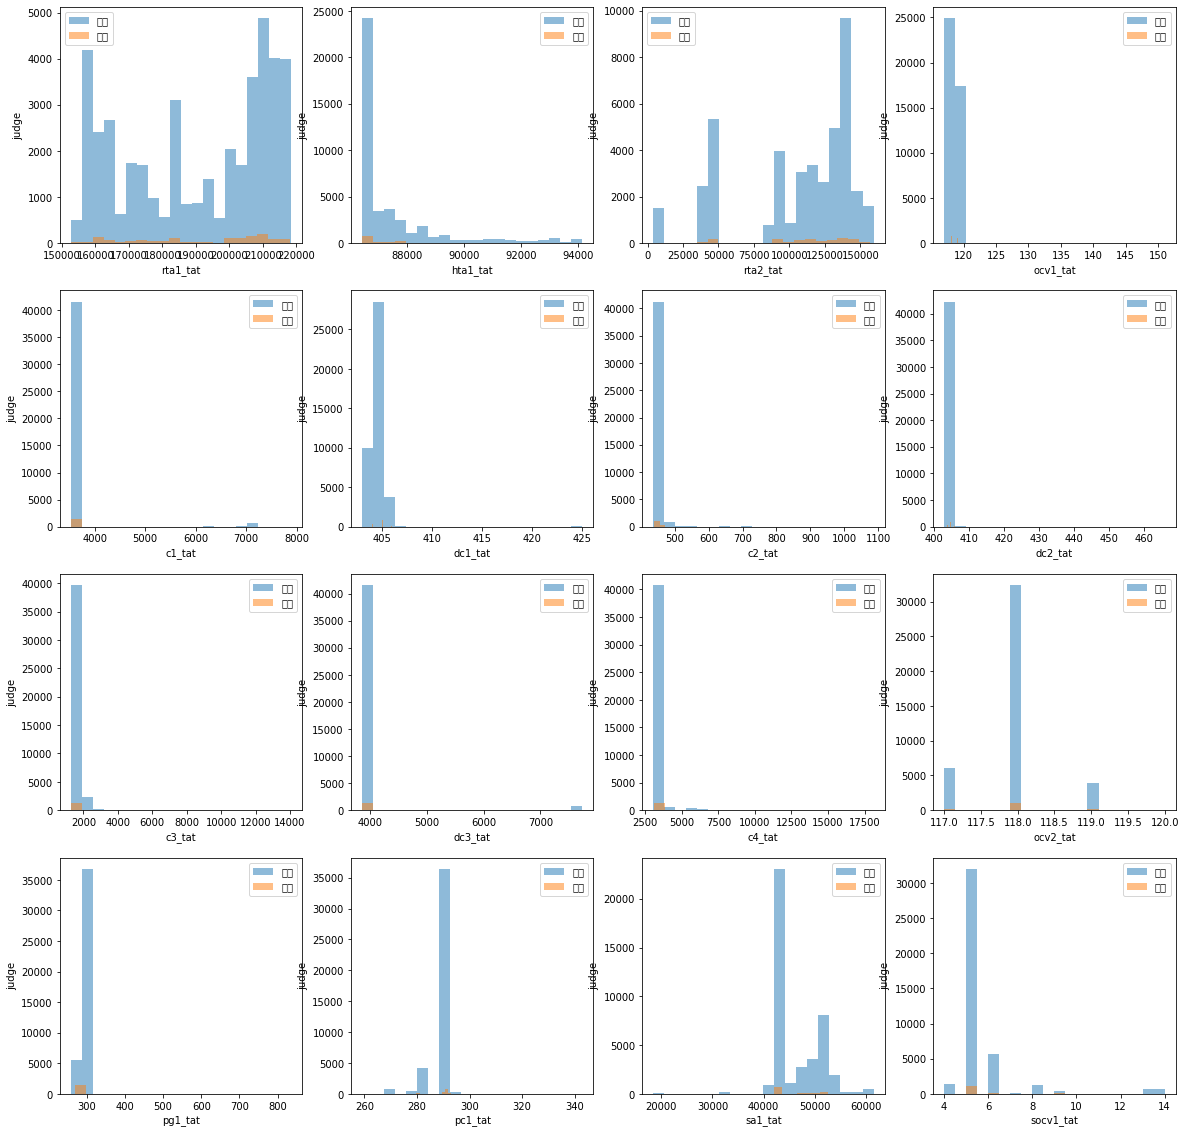

In [80]:
i = 0
plt.figure(figsize = (20, 20))

cols = ['rta1_tat', 'hta1_tat', 'rta2_tat', 'ocv1_tat', 'c1_tat', 'dc1_tat',
       'c2_tat', 'dc2_tat', 'c3_tat', 'dc3_tat', 'c4_tat', 'ocv2_tat',
       'pg1_tat', 'pc1_tat', 'sa1_tat', 'socv1_tat']

for col in minji_num.columns :
  i += 1
  plt.subplot(4, 4, i)
  plt.hist(minji[minji["judge"] == "양품"][col], bins = 20, label = "양품", alpha = 0.5)
  plt.hist(minji[minji["judge"] == "불량"][col], bins = 20, label = "불량", alpha = 0.5)
  plt.xlabel(col)
  plt.ylabel("judge")
  plt.legend()
plt.show()